In [45]:
from utils import read_envi_ascii, read_raw
import numpy as np
from sklearn.model_selection import train_test_split
from machine_learning import DecisionTree, predict
from scipy.ndimage import binary_dilation

In [46]:
# Read data
data = read_envi_ascii('data/biaotu.txt')


In [47]:
huangqi = data['huangqi']
zazhi1 = data['zazhi1']
zazhi2 = data['zazhi2']
beijing = data['beijing']
gancaopian = data['gancaopian']
hongqi = data['hongqi']

In [48]:
huangqi_y = np.ones(huangqi.shape[0]) * 3
zazhi1_y = np.ones(zazhi1.shape[0]) * 1
zazhi2_y = np.ones(zazhi2.shape[0]) * 2
beijing_y = np.ones(beijing.shape[0]) * 0
gancaopian_y = np.ones(gancaopian.shape[0]) * 4
hongqi_y = np.ones(hongqi.shape[0]) * 5

In [49]:
data_x = np.concatenate((huangqi, zazhi1, zazhi2, beijing, gancaopian, hongqi), axis=0)
data_y = np.concatenate((huangqi_y, zazhi1_y, zazhi2_y, beijing_y, gancaopian_y, hongqi_y), axis=0)

In [50]:
train_x, test_x, train_y, test_y = train_test_split(data_x ,data_y, test_size=0.3, stratify=data_y)

In [51]:
class_weight = {0: 1, 1: 1, 2: 1, 3: 1, 4: 1,5: 1}
file_name = 'models/dt_hebing.p'
DecisionTree(train_x, train_y,test_x, test_y, file_name, class_weight=class_weight)

预测时间： 0.0009975433349609375
DT训练模型评分：1.0
DT待测模型评分：0.8870636550308009
DT预测结果：[5. 5. 3. 2. 1. 5. 4. 2. 1. 1. 1. 1. 5. 4. 0. 0. 4. 2. 3. 5. 1. 2. 4. 1.
 4. 1. 3. 1. 0. 1. 2. 5. 2. 2. 0. 4. 1. 2. 0. 0. 2. 5. 1. 2. 3. 0. 4. 5.
 5. 3. 4. 5. 5. 3. 5. 4. 3. 3. 4. 5. 4. 1. 3. 1. 2. 2. 5. 1. 1. 4. 3. 1.
 2. 5. 2. 2. 3. 1. 3. 0. 0. 1. 4. 4. 5. 1. 4. 2. 4. 4. 2. 3. 0. 3. 3. 2.
 3. 0. 0. 3. 4. 3. 4. 2. 2. 3. 0. 4. 0. 3. 0. 4. 1. 4. 0. 5. 4. 1. 2. 1.
 1. 3. 3. 5. 0. 0. 5. 4. 1. 2. 4. 0. 4. 0. 0. 2. 2. 3. 2. 5. 1. 5. 4. 2.
 3. 3. 5. 0. 2. 1. 2. 1. 0. 2. 1. 4. 4. 1. 4. 1. 3. 4. 2. 0. 4. 5. 5. 3.
 0. 0. 5. 0. 4. 5. 2. 5. 5. 3. 5. 0. 5. 5. 2. 5. 2. 0. 2. 0. 3. 4. 5. 5.
 5. 5. 4. 5. 0. 0. 2. 3. 3. 4. 5. 1. 2. 0. 2. 0. 5. 3. 2. 2. 3. 3. 4. 3.
 3. 1. 4. 4. 1. 5. 5. 1. 4. 5. 3. 3. 4. 4. 2. 3. 2. 3. 1. 1. 4. 0. 0. 0.
 1. 1. 5. 3. 1. 2. 5. 4. 1. 2. 3. 5. 3. 0. 2. 0. 4. 1. 1. 3. 0. 2. 3. 2.
 0. 5. 1. 3. 5. 3. 2. 1. 0. 4. 1. 0. 3. 3. 2. 3. 0. 5. 5. 1. 3. 1. 4. 3.
 5. 5. 2. 0. 2. 5. 0. 3. 2. 1. 4. 1. 5. 5. 3. 1.

In [52]:
pic = read_raw('data/hebing.raw', shape=(692, 272, 768))

In [53]:
pic_shape0 = pic.shape[0]
pic_shape1 = pic.shape[1]
pic = pic.reshape(-1, 272)

In [54]:
pre_pic = predict(pic, file_name)

预测时间： 0.16210532188415527


In [55]:
pre_pic = pre_pic.reshape(pic_shape0, pic_shape1)

pre_pic_colored = np.zeros((pre_pic.shape[0], pre_pic.shape[1], 3), dtype=np.uint8)

pre_pic_colored[pre_pic == 0] = [0, 0, 0]
pre_pic_colored[pre_pic == 1] = [255, 0, 0]
pre_pic_colored[pre_pic == 2] = [0, 255, 0]
pre_pic_colored[pre_pic == 3] = [0, 0, 255]
pre_pic_colored[pre_pic == 4] = [255, 255, 0]
pre_pic_colored[pre_pic == 5] = [255, 0, 255]


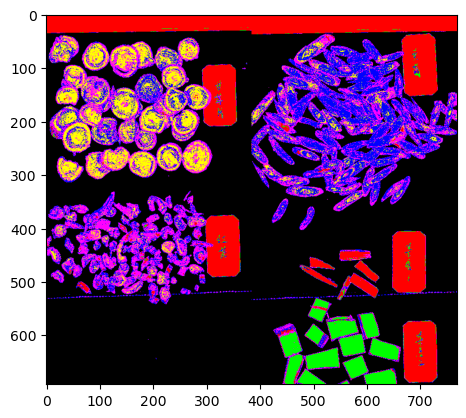

In [56]:
# 展示并保存预测结果
import matplotlib.pyplot as plt
plt.imshow(pre_pic_colored)
plt.savefig('hebing.png', dpi=300)

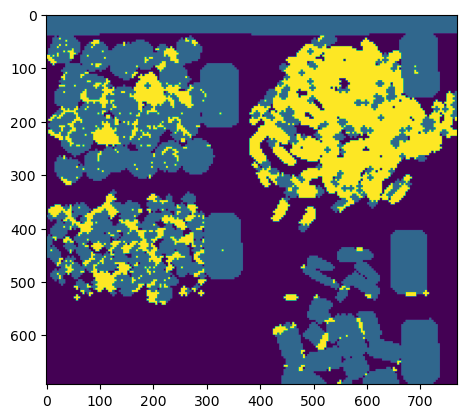

In [57]:
blk_size = 4
# 将pre_pic分块
pre_pic_block = []
for i in range(0, pre_pic.shape[0], blk_size):
    for j in range(0, pre_pic.shape[1], blk_size):
        pre_pic_block.append(pre_pic[i:i+blk_size, j:j+blk_size])
# 每一块按照块中出现最多的类别赋值
pre_pic_block = np.array(pre_pic_block).astype(np.uint8)
pre_pic_block = pre_pic_block.reshape(-1, blk_size*blk_size)
pre_pic_block = np.array([np.argmax(np.bincount(i)) for i in pre_pic_block])
pre_pic_block = pre_pic_block.reshape(pre_pic.shape[0]//blk_size, pre_pic.shape[1]//blk_size)

pre_pic_block[pre_pic_block == 2] = 1
pre_pic_block[pre_pic_block == 4] = 1
pre_pic_block[pre_pic_block == 5] = 1

mask_3 = pre_pic_block == 3

pre_pic_block[binary_dilation(mask_3, iterations=1)] = 3

mask_1 = pre_pic_block == 1

pre_pic_block[binary_dilation(mask_1, iterations=1)] = 1

# blk_size = 4
# # 将pre_pic分块
# pre_pic_block = []
# for i in range(0, pre_pic.shape[0], blk_size):
#     for j in range(0, pre_pic.shape[1], blk_size):
#         pre_pic_block.append(pre_pic[i:i+blk_size, j:j+blk_size])
# # 每一块按照块中出现最多的类别赋值
# pre_pic_block = np.array(pre_pic_block).astype(np.uint8)
# pre_pic_block = pre_pic_block.reshape(-1, blk_size*blk_size)
# pre_pic_block = np.array([np.argmax(np.bincount(i)) for i in pre_pic_block])
# pre_pic_block = pre_pic_block.reshape(pre_pic.shape[0]//blk_size, pre_pic.shape[1]//blk_size)

# 对3进行膨胀


# # 对1进行膨胀
# pre_pic_block = binary_dilation(pre_pic_block == 1, iterations=1)
# pre_pic_block = pre_pic_block.astype(np.uint8)


# # 将0和3都赋值为0 ，其余都为1
# pre_pic_block[pre_pic_block == 3] = 0
# pre_pic_block[pre_pic_block == 1] = 0
# pre_pic_block[pre_pic_block == 2] = 1
# pre_pic_block[pre_pic_block == 4] = 1
# pre_pic_block[pre_pic_block == 5] = 1

# 再将每一块的值赋值给原图
pre_pic_block = np.repeat(pre_pic_block, blk_size, axis=0)
pre_pic_block = np.repeat(pre_pic_block, blk_size, axis=1)
# 展示并保存预测结果
import matplotlib.pyplot as plt
plt.imshow(pre_pic_block)
plt.savefig('hebing_block3.png', dpi=300)